In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
torch.randn(5)  # normal distrobution
torch.rand(5)  # random number

tensor([0.5843, 0.1137, 0.3108, 0.4373, 0.9492])

In [3]:
N = 20
X = torch.rand(N)  # 生成n个随机数,0-1
k = 2; b = 3
Y = k * X + b + torch.randn(N) * 0.02  # 噪声用randn，正态分布

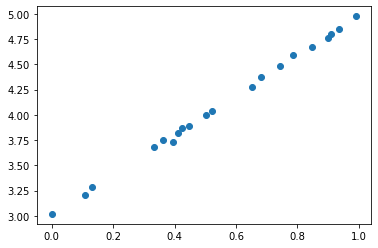

In [4]:
plt.scatter(X, Y)  # 快速画图

In [5]:
w_k = torch.rand(1)
w_k.requires_grad = True
w_b = torch.rand(1)
w_b.requires_grad = True
w_k, w_b

(tensor([0.7030], requires_grad=True), tensor([0.1403], requires_grad=True))

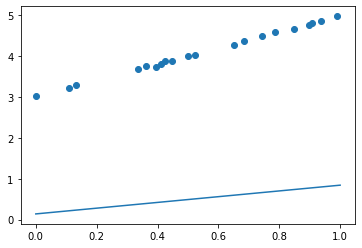

In [6]:
test_x = torch.linspace(0, 1, 100)
test_y = test_x * w_k.detach() + w_b.detach()  # .detach() == .data
plt.plot(test_x, test_y)
plt.scatter(X, Y)

In [7]:
y_hat = w_k * X + w_b
loss = ((y_hat - Y)**2).mean()  # 求数组平均值
loss

tensor(12.8948, grad_fn=<MeanBackward0>)

In [8]:
y_hat

tensor([0.7986, 0.7787, 0.2328, 0.6202, 0.4290, 0.5081, 0.2174, 0.3958, 0.8370,
        0.4546, 0.4928, 0.6930, 0.7724, 0.5982, 0.1407, 0.7358, 0.3756, 0.6637,
        0.4174, 0.4387], grad_fn=<AddBackward0>)

In [9]:
w_k.grad, w_b.grad

(None, None)

In [10]:
loss.backward()

In [11]:
w_k, w_b

(tensor([0.7030], requires_grad=True), tensor([0.1403], requires_grad=True))

In [12]:
w_k.grad, w_b.grad

(tensor([-4.1674]), tensor([-7.1455]))

In [13]:
lr = 0.05

In [14]:
w_k, w_b

(tensor([0.7030], requires_grad=True), tensor([0.1403], requires_grad=True))

In [15]:
w_k.data = w_k.data - lr * w_k.grad.data
w_b.data = w_b.data - lr * w_b.grad.data

In [16]:
w_k, w_b

(tensor([0.9114], requires_grad=True), tensor([0.4975], requires_grad=True))

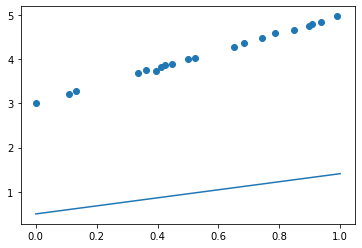

In [17]:
test_x = torch.linspace(0, 1, 100)
test_y = test_x * w_k.detach() + w_b.detach()
plt.plot(test_x, test_y)
plt.scatter(X, Y)

In [18]:
w_b.grad.data = torch.zeros(1)
w_k.grad.data = torch.zeros(1)

In [19]:
w_k, w_b

(tensor([0.9114], requires_grad=True), tensor([0.4975], requires_grad=True))

In [20]:
w_k.grad, w_b.grad

(tensor([0.]), tensor([0.]))

In [21]:
lr = 0.02
for i in range(10):
    # clear grad
    # calc y_hat
    # calc loss
    # backward
    # update grad
    # update w_k, w_b
    pass